In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
current_path = '/content/drive/My Drive/Colab Notebooks/Project_GANder/gankook_cuda/semantic-segmentation-pytorch/'

import os

os.chdir(current_path)
!ls

 ade20k-resnet50dilated-ppm_deepsup
 batch_tensor
 Building_images
 ckpt
'Color Synthetic All_Color.ipynb'
'Color Synthetic All_Color_Shift.ipynb'
'Color Synthetic.ipynb'
'Color Synthetic Randomic.ipynb'
 config
 cooperative_scene_parsing
 data
 decoder_tensor_image.png
 demo_test.sh
 download_ADE20K.sh
 DrivingLaneDetection
 DuLa-Net
 edge_tensor
 edge_tensor_image.png
 encoder_tensor_image.png
 eval_multipro.py
 eval.py
 extractRect.py
'Layout Estimation.ipynb'
 LICENSE
 lsun
 lsun-room
 lsun-room-dsc
 mask_data
 mit_semseg
 pretrained
 problem_test_data
 problem_test_result
 __pycache__
 pytorch_refinenet
 pytorch.room.layout
 Pytorch-UNet
 README.md
 refer_data
 requirements.txt
 roomnet
 ScanNet-Layout
'Scene Estimation.ipynb의 사본'
 setup.py
 SSP.ipynb
 SSP_plus_weights_Ceiling.ipynb
 SSP_plus_weights_Floor.ipynb
 SSP_plus_weights_Tester.ipynb
 SSP_plus_weights_Video_Tester.ipynb
 SSP_plus_weights_Wall.ipynb
 syn_result
 teaser
 tensor_image.png
 test_data
 test.py
 test_result

### Refer Data Rotation & Rescaling

In [ ]:
object_ = 'wall'
refer_path = './refer_data/' + object_ + '/'

scale_factor = 5
rotate_factor = 0

import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import os

try:
  os.makedirs(refer_path + 'scaled/')

except Exception as e:
  print(e)

for index, refer_image in enumerate(os.listdir(refer_path)):
  
  if os.path.isdir(refer_path + refer_image):
    continue
  if not refer_image.endswith('.jpg'):
    continue

  refer = Image.open(refer_path + refer_image)
  print(refer.size)
  # refer = cv2.imread(refer_path + refer_image)
  plt.imshow(refer)
  plt.show()

  # refer = refer.resize((int(refer.size[0] / 2), int(refer.size[1] / 2)))
  # refer = refer.resize((refer.size[0] * 2, refer.size[1] * 2))

  #       Pattern 바둑판식 배열       #
  refer = np.asarray(refer)
  print(refer.shape)
  refer = np.tile(refer, (scale_factor, scale_factor, 1))
  # print(scaled_refer.shape)

  refer = Image.fromarray(refer)
  refer_org = np.asarray(refer.copy())

  #               회전                #
  refer = refer.rotate(rotate_factor)
  refer = np.asarray(refer)

  #       회전 이전의 그림의 중심으로한 원에 내접하는 정사각형을 추출한다 -> final refer data     #
  center_p = (int(refer.shape[0] / 2), int(refer.shape[1] / 2))
  # print(center_p)
  radius = min(center_p)
  # print(radius)
  half_square_edge = radius / (2 ** 0.5)
  # square_point = 
  min_x, max_x = center_p[0] - half_square_edge, center_p[0] + half_square_edge
  min_y, max_y = center_p[1] - half_square_edge, center_p[1] + half_square_edge

  # cv2.circle(refer, center_p[::-1], int(radius), (255, 0, 0), 10)
  # cv2.circle(refer, center_p[::-1], 50, (255, 0, 0), -1)
  # cv2.circle(refer_org, center_p[::-1], int(radius), (255, 0, 0), 10)
  # cv2.circle(refer_org, center_p[::-1], 50, (255, 0, 0), -1)
  # plt.imshow(np.hstack((refer_org, refer)))
  # plt.show()

  refer = refer[int(min_x):int(max_x), int(min_y):int(max_y)]

  # refer = refer.resize((np.asarray(refer).shape[0] * 2, np.asarray(refer).shape[1] * 2))
  # plt.imshow(refer)
  # plt.show()

  # Image.fromarray(refer).save(refer_path + 'scaled/' + refer_image)

  # break

### Randomic Synthetic Image

[Errno 17] File exists: './video_syn_result/12/wall/'
mask : 2.0.png
refer_image : blue-with-vignette-marble-texture-background-with-copy-space_23-2148327728.jpg
scale_factor : 6
refer.shape : (1080, 1920, 3)


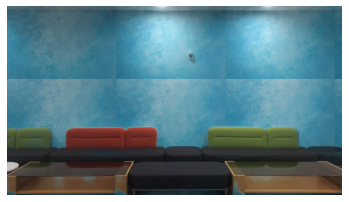

refer_image : Soft-Grunge-Textures.jpg
scale_factor : 6
refer.shape : (1080, 1920, 3)


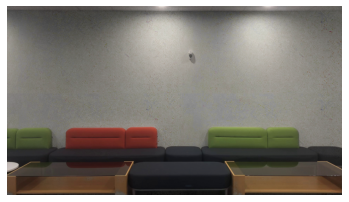

refer_image : textile-2918844__340.jpg
scale_factor : 6
refer.shape : (1080, 1920, 3)


KeyboardInterrupt: ignored

In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import math

def min_max_scale(x):

  scaled_x = (x - x.min()) / (x.max() - x.min())
  return scaled_x

object_ = 'wall'

#     Image Version     #
mask_path = './test_result/' + object_ + '/'
# mask_path = './mask_data/' + object_ + '/'
# refer_path = './refer_data/' + object_ + '/'
refer_path = './refer_data/' + object_ + '/' + 'scaled/'
save_path = mask_path.replace('mask_data', 'syn_result')

#     Video Version     #
# mask_path = './video_result/12/' + object_ + '/'
# refer_path = './refer_data/' + object_ + '/'
# # refer_path = './refer_data/' + object_ + '/' + 'scaled/'
# save_path = mask_path.replace('video_result', 'video_syn_result')

refer_shift = False

try:
  os.makedirs(save_path)

except Exception as e:
  print(e)


mask_list = list()

for mask in (os.listdir(mask_path)):

  if os.path.isdir(mask_path + mask):
      continue
  # mask = '720x480_20191004110915620_aVLsnTL8a4.png'
  print('mask :', mask)

  new_save_path = save_path + mask.replace('.png', '') + '/'
  if not refer_shift:
    try:
      os.makedirs(new_save_path)
    
    except Exception as e:
      print(e)

  # rand_refer_list = random.sample(os.listdir(refer_path), 5)
  # for index, refer_image in enumerate(rand_refer_list):
  for index, refer_image in enumerate(os.listdir(refer_path)):
    # refer_image = 'grata.jpg'
    if os.path.isdir(refer_path + refer_image):
      continue
    print('refer_image :', refer_image)

  
    image = Image.open(mask_path + mask)
    org, mask_img = np.split(np.array(image), 2, axis=1)
    # print(org.shape, mask_img.shape)


    #       Refer Shifting    #
    scene_point = [57, 113, 164, 222, 276]
    if refer_shift:
      frame_num = int(mask.split('.')[0])
      if frame_num < scene_point[0]:
        final_img = Image.fromarray(org)
        final_img.save(save_path + '%s_' % index + mask.replace('png', 'jpg'))
        break
      elif frame_num < scene_point[1]:
        refer_image = 'blanc_carrare_d.jpg'
      elif frame_num < scene_point[2]:
        refer_image = '471f8f69c032c6ac94f555120a07d47c.jpg'
      elif frame_num < scene_point[3]:
        refer_image = 'stone-floor-tile-gray-Texture.jpg'
      elif frame_num < scene_point[4]:
        refer_image = 'KakaoTalk_20200903_170455261.jpg'
      else:
        refer_image = '1.jpg'
    # mask_img = min_max_scale(mask_img)
    # plt.imshow(mask_img)
    # plt.show()

    img_size = (mask_img.shape[1], mask_img.shape[0])
    refer = Image.open(refer_path + refer_image)
    # refer = refer.resize(img_size)

    # print('img_size :', img_size)

    #     Resize가 아니라 Image Size만큼 일정한 규격의 refer_data를 채워주어야한다.     #
    #       -> Image Size 보다 크게 만든 다음, Image Size를 입력받아 그 값만큼만 cropping 한다.     #
    scale_factor = math.ceil(max((img_size[0] / refer.size[0]), (img_size[1] / refer.size[1])))
    scale_factor = 6
    print('scale_factor :', scale_factor)
    refer = np.asarray(refer)
    refer = np.tile(refer, (scale_factor, scale_factor, 1))
    refer = refer[:img_size[1], :img_size[0]]
    # print('refer.shape :', refer.shape)
    # refer = Image.fromarray(refer)

    #     refer_image Warping     #
    #          Find Max Height Contour Point       #
    if object_ is not 'wall':

      mask_img_gr = mask_img[:mask_img.shape[0] - 10, :mask_img.shape[1] - 10]
      gray = cv2.cvtColor(mask_img_gr, cv2.COLOR_RGB2GRAY)
      # gray = cv2.cvtColor(mask_img.astype(np.float32), cv2.COLOR_RGB2GRAY) * 255
      ret, thr = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
      contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
      # print(contours.shape)

      if object_ == 'floor':
        max_height_point = np.array([[mask_img.shape[0], mask_img.shape[1]]])
        # print(max_height_point)
        for contour in contours:
          # print(contour.shape)
          for point in contour:
            # print(point[0][1], max_height_point[0][1])
            if 0 < point[0][1] <= max_height_point[0][1]:
              # print(max_height_point[0][1])
              max_height_point = point
            # print(point)
            # break
          # ctr = contour.astype(np.int32)
          # cv2.drawContours(mask_img, [ctr], -1, (255, 0, 0), 5)
        
        #       Warping       #
        pts1 = np.float32([max_height_point[0], [0, gray.shape[1]], [gray.shape[0], gray.shape[1]]])
        pts2 = np.float32([[max_height_point[0][0], 0], [0, gray.shape[1]], [gray.shape[0], gray.shape[1]]])

      elif object_ == 'ceiling':
        max_height_point = np.array([[0, 0]])
        # print(max_height_point)
        for contour in contours:
          # print(contour.shape)
          for point in contour:
            # print(point[0][1], max_height_point[0][1])
            if point[0][1] >= max_height_point[0][1]:
              # print(max_height_point[0][1])
              max_height_point = point
            # print(point)
            # break
          # ctr = contour.astype(np.int32)
          # cv2.drawContours(mask_img, [ctr], -1, (255, 0, 0), 5)
        
        #       Warping       #
        pts1 = np.float32([[max_height_point[0][0], max_height_point[0][1]], [0, 0], [gray.shape[1], 0]])
        pts2 = np.float32([[max_height_point[0][0], gray.shape[0]], [0, 0], [gray.shape[1], 0]])

      matrix = cv2.getAffineTransform(pts2, pts1)

      refer = np.asarray(refer)
      refer = cv2.warpAffine(refer, matrix, (refer.shape[1], refer.shape[0]))

    # plt.imshow(refer)
    # plt.show()
    # break
    binary_mask = cv2.cvtColor(mask_img, cv2.COLOR_RGB2GRAY)

    mask_img = mask_img / 255.

    #     1.wall_mask * reference color image + (1 - wall_mask) * original_image)    #
    try:
      syn_ = mask_img * (refer) + (1 - mask_img) * org
      syn = mask_img * syn_ + (1 - mask_img) * org
    
    except Exception as e:
      print(e)
      continue

    # syn = mask_img * (0.5 * np.array(refer) + 0.5 * org) + (1 - mask_img) * org
    # print(syn.max(), syn.min())
    # print(syn.shape)
    
    #       Brightness Reservation      #
    #     2.1st result's hsv('value') channel = w * wall_mask * reference hsv('value') + (1 - w) * (1 - wall_mask) * 1st hsv('value')
    org_hsv = cv2.cvtColor(np.uint8(org), cv2.COLOR_RGB2HSV)
    refer_hsv = cv2.cvtColor(np.uint8(refer), cv2.COLOR_RGB2HSV)
    syn_hsv = cv2.cvtColor(np.uint8(syn), cv2.COLOR_RGB2HSV)

    org_h, org_s, org_v = cv2.split(org_hsv)
    refer_h, refer_s, refer_v = cv2.split(refer_hsv)
    syn_h, syn_s, syn_v = cv2.split(syn_hsv)

    # mask_img = cv2.cvtColor(np.uint8(mask_img), cv2.COLOR_RGB2GRAY)
    # print(mask_img.shape)
    # print(refer_v.shape)
    # print(syn_v.shape)
    # final_syn_hsv = cv2.merge([syn_h, syn_s, syn_v])
    # plt.imshow(np.hstack((syn_h, syn_s, syn_v)))
    # plt.show()
    # plt.imshow(np.hstack((org_h, org_s, org_v)))
    # plt.show()

    hsv_added = cv2.addWeighted(org, 0.7, org_hsv, 0.3, 0)
    kernel_size, low_threshold, high_threshold = 5, 0, 150
    hsv_added = cv2.GaussianBlur(hsv_added, (kernel_size, kernel_size), 0)
    hsv_added = cv2.Canny(hsv_added, low_threshold, high_threshold)
    # hsv_added = np.invert(hsv_added)
    # plt.imshow(hsv_added)
    # plt.show()
    binary_edge = cv2.GaussianBlur(binary_mask, (kernel_size, kernel_size), 0)
    binary_edge = cv2.Canny(binary_edge, low_threshold, high_threshold)
    # plt.imshow(binary_edge)
    # plt.show()

    w = .5
    # print(syn_v.min(), syn_v.max())
    # syn_v = w * mask_img * refer_v + (1 - w) * (1 - mask_img) * org_v
    prev_syn_v = syn_v.copy()
    syn_v_im = w * syn_v + (1 - w) * org_v
    syn_v = w * syn_v_im + (1 - w) * org_v
    # syn_v = mask_img * syn_v * k + (1 - mask_img) * org_v
    syn_v = syn_v.astype(np.uint8)
    # print(syn_v.min(), syn_v.max())

    # prev_syn_h = syn_h.copy()
    # syn_h = w * syn_h + (1 - w) * org_h
    # syn_h = syn_h.astype(np.uint8)

    # syn_s = w * syn_s + (1 - w) * org_s
    # syn_s = syn_s.astype(np.uint8)


    # prev_syn_s = syn_s.copy()
    # syn_s = w * syn_s + (1 - w) * org_s
    # syn_s = syn_s.astype(np.uint8)

    # print(syn_h.dtype)
    # print(syn_s.dtype)
    # print(syn_v.dtype)
    im_syn_hsv = cv2.merge([syn_h, syn_s, syn_v_im.astype(np.uint8)])
    im_syn = cv2.cvtColor(im_syn_hsv, cv2.COLOR_HSV2RGB)

    final_syn_hsv = cv2.merge([syn_h, syn_s, syn_v])
    final_syn = cv2.cvtColor(final_syn_hsv, cv2.COLOR_HSV2RGB)

    # plt.imshow(np.hstack((org, syn_hsv, np.uint8(syn))))
    # # plt.imshow(mask_img)
    # # plt.imshow(cv2.add(org, np.invert(mask_img)))
    # plt.imshow(syn_hsv)
    # plt.show()

    # plt.imshow(org_v)
    # plt.imshow(np.hstack((prev_syn_v, syn_v)))
    # plt.imshow(np.hstack((syn_hsv, final_syn_hsv)))
    # plt.imshow(mask_img * 255)
    # plt.figure(figsize=(15, 10))
    # plt.imshow(np.hstack((org, np.uint8(syn_), np.uint8(syn), im_syn, final_syn)))
    plt.imshow(final_syn)
    # plt.imshow(np.hstack((org, final_syn)))

    # print(syn.shape)
    # print(syn_h.shape)
    # plt.imshow(np.hstack((syn_h, syn_s, syn_v)))
    # plt.imshow(cv2.merge((syn_h, syn_s, syn_v)))


    # plt.imshow(refer)
    # plt.imshow(1 - mask_img)
    plt.axis('off')
    plt.show()
    # plt.savefig(save_path + '%s_' % index + mask.replace('png', 'jpg'))

    # if not refer_shift:
    #   if index == 0:
    #     org_img = Image.fromarray(org)
    #     org_img.save(new_save_path + mask.replace('png', 'jpg'))
    #   final_img = Image.fromarray(final_syn)
    #   final_img.save(new_save_path + '%s_texture_' % index + mask.replace('png', 'jpg'))
    # else:
    #   final_img = Image.fromarray(final_syn)
    #   final_img.save(save_path + '%s_' % index + mask.replace('png', 'jpg'))

    # break
  break

### Image to Video

In [ ]:
import cv2
import numpy as np
import glob
import os


object_ = 'wall'
video_path = 'video_syn_result/16/' + object_ + '/'
 
image_list = glob.glob(video_path + '*.jpg')
img_array = []
for i in range(len(image_list)):
  try:
    filename = video_path + '0_%s.0.jpg' % (i + 1)
    print('filename:', filename)
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

  except:
    pass
 
 
out = cv2.VideoWriter(video_path.replace(object_ + '/', '') + 'syned_video.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 30, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

### Warp Affine

[[476. 161.]
 [  0.   0.]
 [710.   0.]] [[476. 470.]
 [  0.   0.]
 [710.   0.]]
[[476 161]]


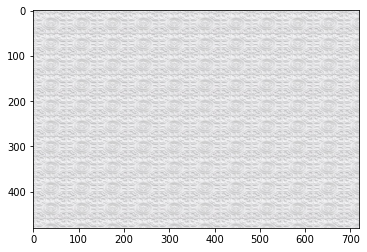

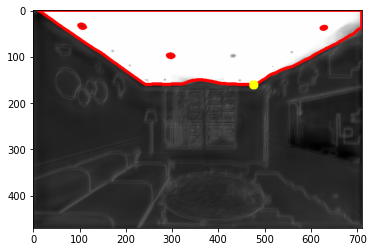

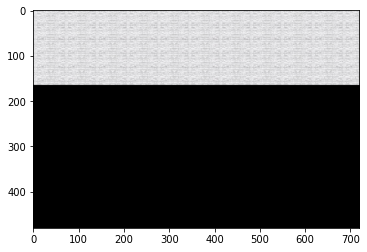

In [ ]:
import imutils

for mask in os.listdir(mask_path):
  # print(mask)

  # mask_img = cv2.imread(mask_path + mask)
  mask_img = Image.open(mask_path + mask)
  org, mask_img = np.split(np.array(mask_img), 2, axis=1)
  mask_img = mask_img[:mask_img.shape[0] - 10, :mask_img.shape[1] - 10]
  # plt.imshow(mask_img)
  # plt.show()

  gray = cv2.cvtColor(mask_img, cv2.COLOR_RGB2GRAY)
  # gray = cv2.cvtColor(mask_img.astype(np.float32), cv2.COLOR_RGB2GRAY) * 255
  ret, thr = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
  # thr = thr.astype(np.uint8)
  # print(thr.shape)
  # print(thr.dtype)
  # print(thr.max())
  # print(thr.astype(np.uint8))

  contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  # print(contours.shape)

  #          Find Max Height Contour Point       #
  # max_height_point = np.array([[mask_img.shape[0], mask_img.shape[1]]])
  max_height_point = np.array([[0, 0]])
  # print(max_height_point)
  for contour in contours:
    # print(contour.shape)
    for point in contour:
      # print(point[0][1], max_height_point[0][1])
      # if 0 < point[0][1] <= max_height_point[0][1]:
      if point[0][1] >= max_height_point[0][1]:
        # print(max_height_point[0][1])
        # print('point[0][1] >= max_height_point[0][1] :', point[0][1] >= max_height_point[0][1])
        max_height_point = point
      # print(point)
      # break
    ctr = contour.astype(np.int32)
    cv2.drawContours(mask_img, [ctr], -1, (255, 0, 0), 5)
    # hull = cv2.convexHull(contour, clockwise=False)
    # cv2.drawContours(mask_img, [hull], -1, (255, 0, 0), 5)
    # break
  # print(max_height_point)
  cv2.circle(mask_img, (max_height_point[0][0], max_height_point[0][1]), 10, (255, 255, 0), -1)

  # x, y, w, h = cv2.boundingRect(contours[0])
  # print(x, y)
  # rect = cv2.minAreaRect(contours[0])
  # box = cv2.boxPoints(rect)
  # box = box.astype('int')

  # contours = imutils.grab_contours(contours)
  # c = max(contours, key=cv2.contourArea)
  # draw the contours of c
  # cv2.drawContours(image, [c], -1, (0, 0, 255), 2)

  epsilon1 = 0.03 * cv2.arcLength(contours[0], True)
  approx1 = cv2.approxPolyDP(contours[0], epsilon1, True)

  # cv2.drawContours(mask_img, [approx1], 0, (255, 255, 0), 5)
  # cv2.drawContours(mask_img, [box], 0, (255, 0, 0), 5)
  # cv2.drawContours(mask_img, [contours[0]], 0, (255, 0, 0), 5)

  # cv2.rectangle(mask_img, (x, y), (x+w, y+h), (0, 0, 255), 3)
  #       Warping       #
  pts1 = np.float32([[max_height_point[0][0], max_height_point[0][1]], [0, 0], [gray.shape[1], 0]])
  pts2 = np.float32([[max_height_point[0][0], gray.shape[0]], [0, 0], [gray.shape[1], 0]])
  print(pts1, pts2)
  print(max_height_point)

  matrix = cv2.getAffineTransform(pts2, pts1)

  refer_image = '5f0f768b52b5fa3fd09c48e5b6409a09.jpg'
  refer = Image.open(refer_path + refer_image)
  refer = refer.resize(img_size)

  plt.imshow(refer)
  plt.show()
  refer = np.asarray(refer)
  refer = cv2.warpAffine(refer, matrix, (refer.shape[1], refer.shape[0]))


  # thr = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
  # plt.imshow(final_img)
  # plt.imshow(thr)
  plt.imshow(mask_img)
  # plt.imshow(gray)
  # plt.axis('off')
  plt.show()
  plt.imshow(refer)
  plt.show()
  break

### Data Moving

In [ ]:
import shutil
import os

video_path = './video_result/2/'
video_list = os.listdir(video_path)
print(len(video_list))

for video in video_list:
  if not video.endswith('.png'):
    continue

  try:
  shutil.move(video_path + video, video_path + 'wall/' + video)

In [ ]:
rand_refer_list = random.sample([1, 2, 3, 4, 5, 6, 7, 8, 9], 5)
print(rand_refer_list)

[4, 2, 7, 8, 3]
